# 2-d logistic regression primer

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# least squares cost function gradient
def compute_gradient(x,y,w):
    P = len(y)
    grad = 0
    for p in range(P):
        x_p = np.array([1,x[p]])
        x_p.shape = (len(x_p),1)
        y_p = y[p]
        temp = np.dot(x_p*x_p.T,w) - x_p*y_p
        grad+=2*temp
    return grad

In [4]:
# least squares cost function evaluation function
def compute_costval(x,y,w):
    P = len(y)
    costval = 0
    for p in range(P):
        x_p = np.array([1,x[p]])
        x_p.shape = (len(x_p),1)
        y_p = y[p]
        temp = (np.dot(x_p.T,w) - y_p)**2
        costval+=temp
    return costval[0]

In [5]:
# linear regression gradient descent 
def grad_descent(x,y,alpha,K):
    # initial point
    w = np.random.randn(np.shape(x)[1]+1,1)
    
    # container for weight history
    whist = []
    for j in range(K):
        # compute current cost value an store
        g = compute_costval(x,y,w)
        whist.append(w)

        # compute grad
        grad = compute_gradient(x,y,w)
        
        # take descent step
        w = w - alpha*grad
    
    return whist

In [6]:
# load a dataset
data = np.loadtxt('1d_logistic_data_v2.csv')
x = data[:,0]
x.shape = (len(x),1)
y = data[:,1]
y.shape = (len(y),1)

# fit linear regression to dataset via gradient descent
alpha = 10**-3
K = 1000
whist = grad_descent(x,y,alpha,K)

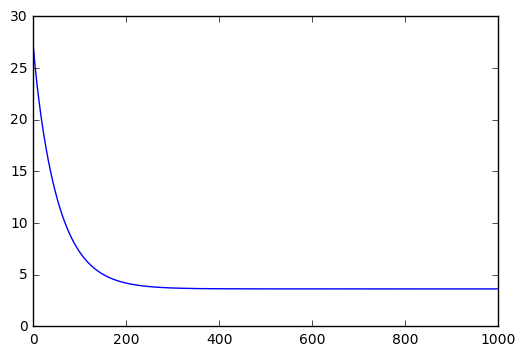

In [8]:
ghist = []
for k in range(K):
    w_k = whist[k]
    g_k = compute_costval(x,y,w_k)
    ghist.append(g_k)
plt.plot(ghist)
plt.show()

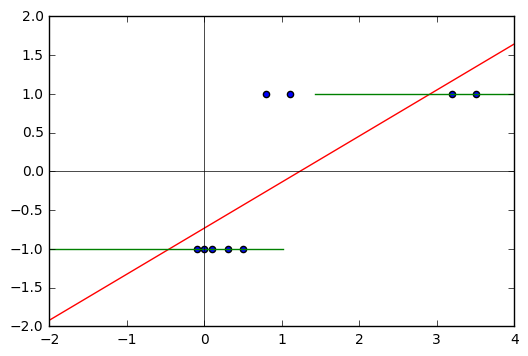

In [9]:
# get best weight
k_star = np.argmin(ghist)
w = whist[k_star]

# generate input for best fit line
xgap = 0.1*(max(x) - min(x))
s = np.linspace(min(x) - xgap, max(x) + xgap)
s = np.linspace(-10,10)

# create best fit line
t = w[0] + s*w[1]

# take sign(.) of best fit line
t2 = np.sign(t)

# plot data
plt.scatter(x,y)

# plot best fit line
plt.plot(s,t,color = 'r')

### plot sign(.) of best fit line - split into top step and bottom to plot so matplotlib doesn't connect the two steps
ind = np.argwhere(t2 == -1)
ind = [a[0] for a in ind]
t_temp = t2.copy()
t_temp[ind] = np.nan
plt.plot(s,t_temp,color = 'g')

ind = np.argwhere(t2 == 1)
ind = [a[0] for a in ind]
t_temp = t2.copy()
t_temp[ind] = np.nan
plt.plot(s,t_temp,color = 'g')

# clean up plot, plot x and y axes
s = np.linspace(-10,10)
plt.plot(s,np.zeros((len(s),1)),color = 'k',linewidth = 0.5)
plt.plot(np.zeros((len(s),1)),s,color = 'k',linewidth = 0.5)

plt.xlim([-2,4])
plt.ylim([-2,2])
plt.show()

# Plotting misclassification count surface

<IPython.core.display.Javascript object>


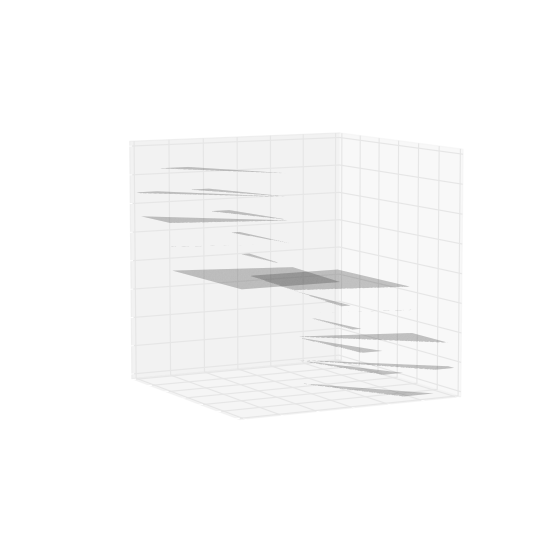

In [16]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# define figure
fig = plt.figure(num=None, figsize=(7,7), dpi=80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(111,projection='3d')

# define coordinate system
r = np.linspace(-15,15,600)    
s,t = np.meshgrid(r,r)
s.shape = (np.prod(np.shape(s)),1)
t.shape = (np.prod(np.shape(t)),1)

# define cost surface
cost = 0
for p in range(len(y)):
    x_p = x[p]
    y_p = y[p]
    cost += (np.sign(y_p*(s + t*x_p)) - 1)**2

# loop over levels and print
s.shape = (len(r),len(r))
t.shape = (len(r),len(r))

levels = np.unique(cost)
for u in levels:
    # make copy of cost and nan out all non level entries
    z = cost.copy()
    ind = np.argwhere(z != u)
    ind = [v[0] for v in ind]
    z[ind] = np.nan

    # plot the current level
    z.shape = (len(r),len(r)) 
    ax1.plot_surface(s,t,z,alpha = 0.3,color = '#696969',zorder = 0,shade = True,linewidth=0)

# turn off tick labels
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_zticklabels([])

# set viewing angle
ax1.view_init(5,126)

# Get rid of the spines on the 3d plot
levels = [int(s) for s in levels]
ax1.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax1.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax1.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# turn off tick marks
ax1.xaxis.set_tick_params(size=0,color = 'w')
ax1.yaxis.set_tick_params(size=0,color = 'w')
ax1.zaxis.set_tick_params(size=0,color = 'w')

<IPython.core.display.Javascript object>


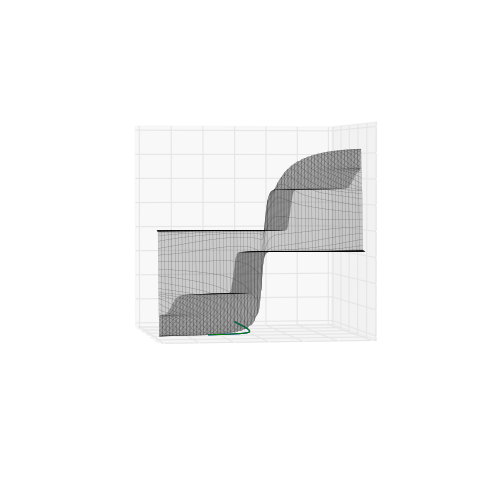

In [18]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# define figure
fig = plt.figure(num=None, figsize=(6,6), dpi=80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(111,projection='3d')

# define coordinate system
r = np.linspace(-15,15,600)    
s,t = np.meshgrid(r,r)
s.shape = (np.prod(np.shape(s)),1)
t.shape = (np.prod(np.shape(t)),1)

# define cost surface
cost = 0
for p in range(len(y)):
    x_p = x[p]
    y_p = y[p]
    cost += (np.tanh(y_p*(s + t*x_p)) - 1)**2

# loop over levels and print
s.shape = (len(r),len(r))
t.shape = (len(r),len(r))
cost.shape = (len(r),len(r))
ax1.plot_surface(s,t,cost,alpha = 0.3,color = '#696969',zorder = 0,linewidth=0.2)

# turn off tick labels
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_zticklabels([])

# set viewing angle
ax1.view_init(5,126)

# Get rid of the spines on the 3d plot
levels = [int(s) for s in levels]
ax1.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax1.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax1.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# turn off tick marks
ax1.xaxis.set_tick_params(size=0,color = 'w')
ax1.yaxis.set_tick_params(size=0,color = 'w')
ax1.zaxis.set_tick_params(size=0,color = 'w')

# logistc regression gradient descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def logistic_costval(x,y,w):
    P = len(y)
    cost = 0
    for p in range(P):
        x_p = np.array([1,x[p]])
        x_p.shape = (len(x_p),1)
        y_p = y[p]
        cost += np.log(1 + np.exp(-y_p*np.dot(x_p.T,w)))
    return cost[0]

In [12]:
# function for computing the logistic regression cost gradient
def logistic_gradient(x,y,w):
    # produce gradient for each class weights
    P = len(y)
    grad = 0
    for p in range(P):
        x_p = np.array([1,x[p]])
        x_p.shape = (len(x_p),1)
        y_p = y[p]
        grad+= -1/(1 + np.exp(y_p*np.dot(x_p.T,w)))*y_p*x_p
    
    grad.shape = (len(grad),1)
    return grad

In [13]:
# gradient descent function for softmax cost/logistic regression 
def logistic_grad_descent(x,y,w,alpha,K):
    # container for weight history
    whist = []
    
    # grad descent loop
    for j in range(K):
        # update container
        whist.append(w)
        
        # compute gradient
        grad = logistic_gradient(x,y,w)
        w = w - alpha*grad;

        # update iteration count
    return whist

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# load a dataset
data = np.loadtxt('1d_logistic_data_v2.csv')
x = data[:,0]
x.shape = (len(x),1)
y = data[:,1]
y.shape = (len(y),1)

In [30]:
# set inputs to grad descent
alpha = 10**-1
K = 5000
w = np.random.randn(np.shape(x)[1] + 1,1);        # random initial point

# run gradient descent
whist = logistic_grad_descent(x,y,w,alpha,K)

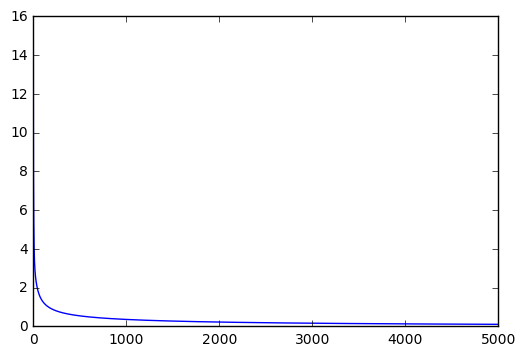

In [31]:
ghist = []
for k in range(K):
    w_k = whist[k]
    g_k = logistic_costval(x,y,w_k)
    ghist.append(g_k)
plt.plot(ghist)
plt.show()

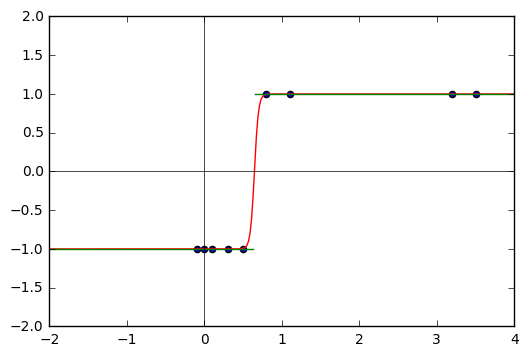

In [34]:
# get best weight
k_star = np.argmin(ghist)
w = whist[k_star]

# generate input for best fit line
xgap = 0.1*(max(x) - min(x))
s = np.linspace(-10,10,1000)

# create best fit sigmoid
t = np.tanh(w[0] + s*w[1])

# take sign(.) of best fit line
t2 = np.sign(t)

# plot data
plt.scatter(x,y)

# plot best fit line
plt.plot(s,t,color = 'r')

### plot sign(.) of best fit line - split into top step and bottom to plot so matplotlib doesn't connect the two steps
ind = np.argwhere(t2 == -1)
ind = [a[0] for a in ind]
t_temp = t2.copy()
t_temp[ind] = np.nan
plt.plot(s,t_temp,color = 'g')

ind = np.argwhere(t2 == 1)
ind = [a[0] for a in ind]
t_temp = t2.copy()
t_temp[ind] = np.nan
plt.plot(s,t_temp,color = 'g')

# clean up plot, plot x and y axes
s = np.linspace(-10,10)
plt.plot(s,np.zeros((len(s),1)),color = 'k',linewidth = 0.5)
plt.plot(np.zeros((len(s),1)),s,color = 'k',linewidth = 0.5)

plt.xlim([-2,4])
plt.ylim([-2,2])
plt.show()